In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision import *
import os
import jams
import csv

In [2]:
path = Config.data_path()/'GuitarSet'
path.mkdir(parents=True, exist_ok=True)
audio_path = path/"audio/audio_mic"
save_path = path/"spectrogram"
save_path.mkdir(parents=True, exist_ok=True)
anno_path = path/'annotation'

In [44]:
test = jams.load(str(anno_path/"00_Jazz1-130-D_comp.jams"))
test = test.search(namespace="chord")[0]
#print(test)

In [82]:
len(save_path.ls())

4944

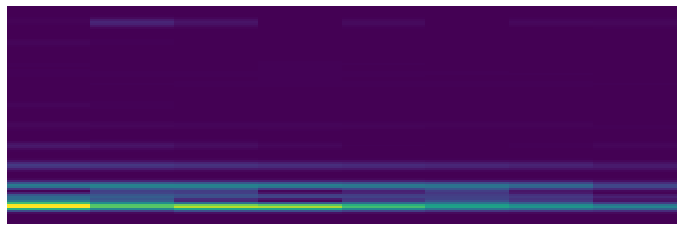

In [74]:
from IPython.display import Image
Image(filename='/home/ubuntu/.fastai/data/GuitarSet/spectrogram/01_Rock1-130-A_comp_mic1800-2200.png') 

In [3]:
def extract_chord_times(f_ref,filename):
    chord_ref = f_ref.search(namespace='chord')[0]
    chord_ref = dict(chord_ref)['data']
    data = [[filename]]
    for x in chord_ref:
        temp = []
        for y in x:
            temp.append(y)
        data.append(temp)
    return data

In [4]:
def file_name_creator(name):
    name = name[47:]
    name = name[:-5] + "_mic"
    return(name)

In [61]:
#Should I add a null value for png's without a chord being played?
def array_to_csv(arr, outfile):
    spec_length = 400
    track_duration = (arr[-1][0] + arr[-1][1])*1000
    t1 = 0
    t2 = spec_length
    with open(outfile, 'a') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        while t2<track_duration:
            temp = []
            for i in range(1, len(arr)):
                start = arr[i][0] * 1000
                end = (arr[i][0]+arr[i][1])*1000
                if (start<=t2 and t2<=end) or (start<=t1 and t1<=end) or (t1<=start and end<=t2):
                    #first line in the csv is the file name, rest is the jams data
                    label = (str(arr[0][0])+str(t1)+"-"+str(t2)+".png")
                    temp.append(arr[i][2])
            if temp != []:
                filewriter.writerow([label]+ temp)
            else:
                filewriter.writerow([label] + [None])
            t1 = t1 + spec_length//2 #Works in milliseconds
            t2 = t2 + spec_length//2

In [78]:
for file in os.listdir(anno_path):
    if file[-4:] == "jams":
        file = str(anno_path/file)
        print(file)
        f_ref = jams.load(file)
        filename = file_name_creator(file)
        chord = extract_chord_times(f_ref, filename)
        array_to_csv(chord,path/"labels.csv")
    else:
        print("Not a jams file: " + file)

/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Jazz1-130-D_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_BN1-129-Eb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Funk3-112-C#_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_SS2-107-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Jazz1-200-B_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Rock1-130-A_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_SS2-107-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Rock3-148-C_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Rock1-130-A_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Funk1-97-C_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_BN2-131-B_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_SS3-84-Bb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_Jazz3-137-Eb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Jazz3-137-Eb_solo.ja

/home/ubuntu/.fastai/data/GuitarSet/annotation/04_BN1-147-Gb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_Jazz2-187-F#_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_Funk3-112-C#_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Funk1-114-Ab_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_SS1-68-E_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_Funk1-114-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Funk1-114-Ab_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_SS1-68-E_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Funk2-108-Eb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Rock2-85-F_solo.jams
Not a jams file: .DS_Store
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Jazz2-187-F#_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_SS1-100-C#_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Rock2-142-D_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/ann

/home/ubuntu/.fastai/data/GuitarSet/annotation/01_SS3-84-Bb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_Funk1-114-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/03_BN1-147-Gb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_BN3-154-E_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/03_Rock3-117-Bb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_Jazz1-130-D_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Funk2-108-Eb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_BN3-154-E_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_BN3-154-E_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Rock3-117-Bb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_Jazz3-137-Eb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_BN1-129-Eb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/01_BN3-119-G_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_BN1-129-Eb_comp.jams


/home/ubuntu/.fastai/data/GuitarSet/annotation/03_BN2-166-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_Funk1-97-C_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Funk3-112-C#_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Funk1-114-Ab_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/03_BN3-119-G_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_Funk3-98-A_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Funk2-108-Eb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/03_Jazz3-137-Eb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/00_Funk2-119-G_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/05_Rock1-130-A_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_SS3-84-Bb_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/03_SS3-84-Bb_solo.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/04_Funk2-119-G_comp.jams
/home/ubuntu/.fastai/data/GuitarSet/annotation/02_BN3-154-E_solo.jams

In [83]:
#read labels.csv
tot = 0
with open(path/"labels.csv", "r") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        tot += 1
        print(', '.join(row))

00_Jazz1-130-D_comp_mic0-400.png,D:maj
00_Jazz1-130-D_comp_mic200-600.png,D:maj
00_Jazz1-130-D_comp_mic400-800.png,D:maj
00_Jazz1-130-D_comp_mic600-1000.png,D:maj
00_Jazz1-130-D_comp_mic800-1200.png,D:maj
00_Jazz1-130-D_comp_mic1000-1400.png,D:maj
00_Jazz1-130-D_comp_mic1200-1600.png,D:maj
00_Jazz1-130-D_comp_mic1400-1800.png,D:maj
00_Jazz1-130-D_comp_mic1600-2000.png,D:maj
00_Jazz1-130-D_comp_mic1800-2200.png,D:maj
00_Jazz1-130-D_comp_mic2000-2400.png,D:maj
00_Jazz1-130-D_comp_mic2200-2600.png,D:maj
00_Jazz1-130-D_comp_mic2400-2800.png,D:maj
00_Jazz1-130-D_comp_mic2600-3000.png,D:maj
00_Jazz1-130-D_comp_mic2800-3200.png,D:maj
00_Jazz1-130-D_comp_mic3000-3400.png,D:maj
00_Jazz1-130-D_comp_mic3200-3600.png,D:maj
00_Jazz1-130-D_comp_mic3400-3800.png,D:maj
00_Jazz1-130-D_comp_mic3600-4000.png,D:maj
00_Jazz1-130-D_comp_mic3800-4200.png,D:maj
00_Jazz1-130-D_comp_mic4000-4400.png,D:maj
00_Jazz1-130-D_comp_mic4200-4600.png,D:maj
00_Jazz1-130-D_comp_mic4400-4800.png,D:maj
00_Jazz1-130-D_comp_m

05_Jazz3-137-Eb_comp_mic26200-26600.png,G#:maj,A#:maj
05_Jazz3-137-Eb_comp_mic26400-26800.png,A#:maj
05_Jazz3-137-Eb_comp_mic26600-27000.png,A#:maj
05_Jazz3-137-Eb_comp_mic26800-27200.png,A#:maj
05_Jazz3-137-Eb_comp_mic27000-27400.png,A#:maj
05_Jazz3-137-Eb_comp_mic27200-27600.png,A#:maj
05_Jazz3-137-Eb_comp_mic27400-27800.png,A#:maj
05_Jazz3-137-Eb_comp_mic27600-28000.png,A#:maj
00_Jazz3-137-Eb_solo_mic0-400.png,D#:maj
00_Jazz3-137-Eb_solo_mic200-600.png,D#:maj
00_Jazz3-137-Eb_solo_mic400-800.png,D#:maj
00_Jazz3-137-Eb_solo_mic600-1000.png,D#:maj
00_Jazz3-137-Eb_solo_mic800-1200.png,D#:maj
00_Jazz3-137-Eb_solo_mic1000-1400.png,D#:maj
00_Jazz3-137-Eb_solo_mic1200-1600.png,D#:maj
00_Jazz3-137-Eb_solo_mic1400-1800.png,D#:maj,A#:maj
00_Jazz3-137-Eb_solo_mic1600-2000.png,D#:maj,A#:maj
00_Jazz3-137-Eb_solo_mic1800-2200.png,A#:maj
00_Jazz3-137-Eb_solo_mic2000-2400.png,A#:maj
00_Jazz3-137-Eb_solo_mic2200-2600.png,A#:maj
00_Jazz3-137-Eb_solo_mic2400-2800.png,A#:maj
00_Jazz3-137-Eb_solo_mic2600

02_Rock2-85-F_comp_mic14000-14400.png,G:hdim7,C:7
02_Rock2-85-F_comp_mic14200-14600.png,C:7
02_Rock2-85-F_comp_mic14400-14800.png,C:7
02_Rock2-85-F_comp_mic14600-15000.png,C:7
02_Rock2-85-F_comp_mic14800-15200.png,C:7
02_Rock2-85-F_comp_mic15000-15400.png,C:7
02_Rock2-85-F_comp_mic15200-15600.png,C:7
02_Rock2-85-F_comp_mic15400-15800.png,C:7
02_Rock2-85-F_comp_mic15600-16000.png,C:7
02_Rock2-85-F_comp_mic15800-16200.png,C:7
02_Rock2-85-F_comp_mic16000-16400.png,C:7
02_Rock2-85-F_comp_mic16200-16600.png,C:7
02_Rock2-85-F_comp_mic16400-16800.png,C:7
02_Rock2-85-F_comp_mic16600-17000.png,C:7,F:min
02_Rock2-85-F_comp_mic16800-17200.png,C:7,F:min
02_Rock2-85-F_comp_mic17000-17400.png,F:min
02_Rock2-85-F_comp_mic17200-17600.png,F:min
02_Rock2-85-F_comp_mic17400-17800.png,F:min
02_Rock2-85-F_comp_mic17600-18000.png,F:min
02_Rock2-85-F_comp_mic17800-18200.png,F:min
02_Rock2-85-F_comp_mic18000-18400.png,F:min
02_Rock2-85-F_comp_mic18200-18600.png,F:min
02_Rock2-85-F_comp_mic18400-18800.png,F:mi

00_SS2-88-F_solo_mic12000-12400.png,G:hdim7
00_SS2-88-F_solo_mic12200-12600.png,G:hdim7
00_SS2-88-F_solo_mic12400-12800.png,G:hdim7
00_SS2-88-F_solo_mic12600-13000.png,G:hdim7
00_SS2-88-F_solo_mic12800-13200.png,G:hdim7
00_SS2-88-F_solo_mic13000-13400.png,G:hdim7
00_SS2-88-F_solo_mic13200-13600.png,G:hdim7
00_SS2-88-F_solo_mic13400-13800.png,G:hdim7,C:7
00_SS2-88-F_solo_mic13600-14000.png,G:hdim7,C:7
00_SS2-88-F_solo_mic13800-14200.png,C:7
00_SS2-88-F_solo_mic14000-14400.png,C:7
00_SS2-88-F_solo_mic14200-14600.png,C:7
00_SS2-88-F_solo_mic14400-14800.png,C:7
00_SS2-88-F_solo_mic14600-15000.png,C:7
00_SS2-88-F_solo_mic14800-15200.png,C:7
00_SS2-88-F_solo_mic15000-15400.png,C:7
00_SS2-88-F_solo_mic15200-15600.png,C:7
00_SS2-88-F_solo_mic15400-15800.png,C:7
00_SS2-88-F_solo_mic15600-16000.png,C:7
00_SS2-88-F_solo_mic15800-16200.png,C:7
00_SS2-88-F_solo_mic16000-16400.png,C:7,F:min
00_SS2-88-F_solo_mic16200-16600.png,C:7,F:min
00_SS2-88-F_solo_mic16400-16800.png,F:min
00_SS2-88-F_solo_mic16

01_Funk3-98-A_comp_mic29400-29800.png,D:maj
01_Funk3-98-A_comp_mic29600-30000.png,D:maj
01_Funk3-98-A_comp_mic29800-30200.png,D:maj
01_Funk3-98-A_comp_mic30000-30400.png,D:maj
01_Funk3-98-A_comp_mic30200-30600.png,D:maj
01_Funk3-98-A_comp_mic30400-30800.png,D:maj
01_Funk3-98-A_comp_mic30600-31000.png,D:maj
01_Funk3-98-A_comp_mic30800-31200.png,D:maj
01_Funk3-98-A_comp_mic31000-31400.png,D:maj
01_Funk3-98-A_comp_mic31200-31600.png,D:maj
01_Funk3-98-A_comp_mic31400-31800.png,D:maj
01_Funk3-98-A_comp_mic31600-32000.png,D:maj,A:maj
01_Funk3-98-A_comp_mic31800-32200.png,D:maj,A:maj
01_Funk3-98-A_comp_mic32000-32400.png,A:maj
01_Funk3-98-A_comp_mic32200-32600.png,A:maj
01_Funk3-98-A_comp_mic32400-32800.png,A:maj
01_Funk3-98-A_comp_mic32600-33000.png,A:maj
01_Funk3-98-A_comp_mic32800-33200.png,A:maj
01_Funk3-98-A_comp_mic33000-33400.png,A:maj
01_Funk3-98-A_comp_mic33200-33600.png,A:maj
01_Funk3-98-A_comp_mic33400-33800.png,A:maj
01_Funk3-98-A_comp_mic33600-34000.png,A:maj
01_Funk3-98-A_comp_m

01_SS3-98-C_solo_mic32800-33200.png,C:maj
01_SS3-98-C_solo_mic33000-33400.png,C:maj
01_SS3-98-C_solo_mic33200-33600.png,C:maj
01_SS3-98-C_solo_mic33400-33800.png,C:maj
01_SS3-98-C_solo_mic33600-34000.png,C:maj
01_SS3-98-C_solo_mic33800-34200.png,C:maj
01_SS3-98-C_solo_mic34000-34400.png,C:maj,F:maj
01_SS3-98-C_solo_mic34200-34600.png,C:maj,F:maj
01_SS3-98-C_solo_mic34400-34800.png,F:maj
01_SS3-98-C_solo_mic34600-35000.png,F:maj
01_SS3-98-C_solo_mic34800-35200.png,F:maj
01_SS3-98-C_solo_mic35000-35400.png,F:maj
01_SS3-98-C_solo_mic35200-35600.png,F:maj
01_SS3-98-C_solo_mic35400-35800.png,F:maj
01_SS3-98-C_solo_mic35600-36000.png,F:maj
01_SS3-98-C_solo_mic35800-36200.png,F:maj
01_SS3-98-C_solo_mic36000-36400.png,F:maj
01_SS3-98-C_solo_mic36200-36600.png,F:maj
01_SS3-98-C_solo_mic36400-36800.png,F:maj,G:maj
01_SS3-98-C_solo_mic36600-37000.png,F:maj,G:maj
01_SS3-98-C_solo_mic36800-37200.png,G:maj
01_SS3-98-C_solo_mic37000-37400.png,G:maj
01_SS3-98-C_solo_mic37200-37600.png,G:maj
01_SS3-98-

00_Funk2-119-G_comp_mic11400-11800.png,D:7
00_Funk2-119-G_comp_mic11600-12000.png,D:7
00_Funk2-119-G_comp_mic11800-12200.png,D:7,G:min
00_Funk2-119-G_comp_mic12000-12400.png,D:7,G:min
00_Funk2-119-G_comp_mic12200-12600.png,G:min
00_Funk2-119-G_comp_mic12400-12800.png,G:min
00_Funk2-119-G_comp_mic12600-13000.png,G:min
00_Funk2-119-G_comp_mic12800-13200.png,G:min
00_Funk2-119-G_comp_mic13000-13400.png,G:min
00_Funk2-119-G_comp_mic13200-13600.png,G:min
00_Funk2-119-G_comp_mic13400-13800.png,G:min
00_Funk2-119-G_comp_mic13600-14000.png,G:min
00_Funk2-119-G_comp_mic13800-14200.png,G:min
00_Funk2-119-G_comp_mic14000-14400.png,G:min
00_Funk2-119-G_comp_mic14200-14600.png,G:min
00_Funk2-119-G_comp_mic14400-14800.png,G:min
00_Funk2-119-G_comp_mic14600-15000.png,G:min
00_Funk2-119-G_comp_mic14800-15200.png,G:min
00_Funk2-119-G_comp_mic15000-15400.png,G:min
00_Funk2-119-G_comp_mic15200-15600.png,G:min
00_Funk2-119-G_comp_mic15400-15800.png,G:min
00_Funk2-119-G_comp_mic15600-16000.png,G:min
00_Fun

05_Jazz3-137-Eb_solo_mic25000-25400.png,G#:maj
05_Jazz3-137-Eb_solo_mic25200-25600.png,G#:maj
05_Jazz3-137-Eb_solo_mic25400-25800.png,G#:maj
05_Jazz3-137-Eb_solo_mic25600-26000.png,G#:maj
05_Jazz3-137-Eb_solo_mic25800-26200.png,G#:maj
05_Jazz3-137-Eb_solo_mic26000-26400.png,G#:maj,A#:maj
05_Jazz3-137-Eb_solo_mic26200-26600.png,G#:maj,A#:maj
05_Jazz3-137-Eb_solo_mic26400-26800.png,A#:maj
05_Jazz3-137-Eb_solo_mic26600-27000.png,A#:maj
05_Jazz3-137-Eb_solo_mic26800-27200.png,A#:maj
05_Jazz3-137-Eb_solo_mic27000-27400.png,A#:maj
05_Jazz3-137-Eb_solo_mic27200-27600.png,A#:maj
05_Jazz3-137-Eb_solo_mic27400-27800.png,A#:maj
05_Jazz3-137-Eb_solo_mic27600-28000.png,A#:maj
05_Funk3-112-C#_solo_mic0-400.png,C#:maj
05_Funk3-112-C#_solo_mic200-600.png,C#:maj
05_Funk3-112-C#_solo_mic400-800.png,C#:maj
05_Funk3-112-C#_solo_mic600-1000.png,C#:maj
05_Funk3-112-C#_solo_mic800-1200.png,C#:maj
05_Funk3-112-C#_solo_mic1000-1400.png,C#:maj
05_Funk3-112-C#_solo_mic1200-1600.png,C#:maj
05_Funk3-112-C#_solo_mi

02_Funk3-98-A_solo_mic17200-17600.png,E:maj
02_Funk3-98-A_solo_mic17400-17800.png,E:maj
02_Funk3-98-A_solo_mic17600-18000.png,E:maj
02_Funk3-98-A_solo_mic17800-18200.png,E:maj
02_Funk3-98-A_solo_mic18000-18400.png,E:maj
02_Funk3-98-A_solo_mic18200-18600.png,E:maj
02_Funk3-98-A_solo_mic18400-18800.png,E:maj
02_Funk3-98-A_solo_mic18600-19000.png,E:maj
02_Funk3-98-A_solo_mic18800-19200.png,E:maj
02_Funk3-98-A_solo_mic19000-19400.png,E:maj
02_Funk3-98-A_solo_mic19200-19600.png,E:maj,A:maj
02_Funk3-98-A_solo_mic19400-19800.png,E:maj,A:maj
02_Funk3-98-A_solo_mic19600-20000.png,A:maj
02_Funk3-98-A_solo_mic19800-20200.png,A:maj
02_Funk3-98-A_solo_mic20000-20400.png,A:maj
02_Funk3-98-A_solo_mic20200-20600.png,A:maj
02_Funk3-98-A_solo_mic20400-20800.png,A:maj
02_Funk3-98-A_solo_mic20600-21000.png,A:maj
02_Funk3-98-A_solo_mic20800-21200.png,A:maj
02_Funk3-98-A_solo_mic21000-21400.png,A:maj
02_Funk3-98-A_solo_mic21200-21600.png,A:maj
02_Funk3-98-A_solo_mic21400-21800.png,A:maj
02_Funk3-98-A_solo_m

03_Rock1-130-A_comp_mic21600-22000.png,A:maj
03_SS2-88-F_comp_mic0-400.png,A#:min
03_SS2-88-F_comp_mic200-600.png,A#:min
03_SS2-88-F_comp_mic400-800.png,A#:min
03_SS2-88-F_comp_mic600-1000.png,A#:min
03_SS2-88-F_comp_mic800-1200.png,A#:min
03_SS2-88-F_comp_mic1000-1400.png,A#:min
03_SS2-88-F_comp_mic1200-1600.png,A#:min
03_SS2-88-F_comp_mic1400-1800.png,A#:min
03_SS2-88-F_comp_mic1600-2000.png,A#:min
03_SS2-88-F_comp_mic1800-2200.png,A#:min
03_SS2-88-F_comp_mic2000-2400.png,A#:min
03_SS2-88-F_comp_mic2200-2600.png,A#:min
03_SS2-88-F_comp_mic2400-2800.png,A#:min,D#:7
03_SS2-88-F_comp_mic2600-3000.png,A#:min,D#:7
03_SS2-88-F_comp_mic2800-3200.png,D#:7
03_SS2-88-F_comp_mic3000-3400.png,D#:7
03_SS2-88-F_comp_mic3200-3600.png,D#:7
03_SS2-88-F_comp_mic3400-3800.png,D#:7
03_SS2-88-F_comp_mic3600-4000.png,D#:7
03_SS2-88-F_comp_mic3800-4200.png,D#:7
03_SS2-88-F_comp_mic4000-4400.png,D#:7
03_SS2-88-F_comp_mic4200-4600.png,D#:7
03_SS2-88-F_comp_mic4400-4800.png,D#:7
03_SS2-88-F_comp_mic4600-5000.

00_SS3-84-Bb_solo_mic14800-15200.png,A#:maj
00_SS3-84-Bb_solo_mic15000-15400.png,A#:maj
00_SS3-84-Bb_solo_mic15200-15600.png,A#:maj
00_SS3-84-Bb_solo_mic15400-15800.png,A#:maj
00_SS3-84-Bb_solo_mic15600-16000.png,A#:maj
00_SS3-84-Bb_solo_mic15800-16200.png,A#:maj
00_SS3-84-Bb_solo_mic16000-16400.png,A#:maj
00_SS3-84-Bb_solo_mic16200-16600.png,A#:maj
00_SS3-84-Bb_solo_mic16400-16800.png,A#:maj
00_SS3-84-Bb_solo_mic16600-17000.png,A#:maj
00_SS3-84-Bb_solo_mic16800-17200.png,A#:maj,D#:maj
00_SS3-84-Bb_solo_mic17000-17400.png,A#:maj,D#:maj
00_SS3-84-Bb_solo_mic17200-17600.png,D#:maj
00_SS3-84-Bb_solo_mic17400-17800.png,D#:maj
00_SS3-84-Bb_solo_mic17600-18000.png,D#:maj
00_SS3-84-Bb_solo_mic17800-18200.png,D#:maj
00_SS3-84-Bb_solo_mic18000-18400.png,D#:maj
00_SS3-84-Bb_solo_mic18200-18600.png,D#:maj
00_SS3-84-Bb_solo_mic18400-18800.png,D#:maj
00_SS3-84-Bb_solo_mic18600-19000.png,D#:maj
00_SS3-84-Bb_solo_mic18800-19200.png,D#:maj
00_SS3-84-Bb_solo_mic19000-19400.png,D#:maj
00_SS3-84-Bb_solo_

01_Funk1-97-C_comp_mic16800-17200.png,C:maj
01_Funk1-97-C_comp_mic17000-17400.png,C:maj
01_Funk1-97-C_comp_mic17200-17600.png,C:maj
01_Funk1-97-C_comp_mic17400-17800.png,C:maj
01_Funk1-97-C_comp_mic17600-18000.png,C:maj
01_Funk1-97-C_comp_mic17800-18200.png,C:maj
01_Funk1-97-C_comp_mic18000-18400.png,C:maj
01_Funk1-97-C_comp_mic18200-18600.png,C:maj
01_Funk1-97-C_comp_mic18400-18800.png,C:maj
01_Funk1-97-C_comp_mic18600-19000.png,C:maj
01_Funk1-97-C_comp_mic18800-19200.png,C:maj
01_Funk1-97-C_comp_mic19000-19400.png,C:maj
01_Funk1-97-C_comp_mic19200-19600.png,C:maj
01_Funk1-97-C_comp_mic19400-19800.png,C:maj,G:maj
01_Funk1-97-C_comp_mic19600-20000.png,C:maj,G:maj
01_Funk1-97-C_comp_mic19800-20200.png,G:maj
01_Funk1-97-C_comp_mic20000-20400.png,G:maj
01_Funk1-97-C_comp_mic20200-20600.png,G:maj
01_Funk1-97-C_comp_mic20400-20800.png,G:maj
01_Funk1-97-C_comp_mic20600-21000.png,G:maj
01_Funk1-97-C_comp_mic20800-21200.png,G:maj
01_Funk1-97-C_comp_mic21000-21400.png,G:maj
01_Funk1-97-C_comp_m

05_Funk3-112-C#_comp_mic12800-13200.png,C#:maj,F#:maj
05_Funk3-112-C#_comp_mic13000-13400.png,F#:maj
05_Funk3-112-C#_comp_mic13200-13600.png,F#:maj
05_Funk3-112-C#_comp_mic13400-13800.png,F#:maj
05_Funk3-112-C#_comp_mic13600-14000.png,F#:maj
05_Funk3-112-C#_comp_mic13800-14200.png,F#:maj
05_Funk3-112-C#_comp_mic14000-14400.png,F#:maj
05_Funk3-112-C#_comp_mic14200-14600.png,F#:maj
05_Funk3-112-C#_comp_mic14400-14800.png,F#:maj
05_Funk3-112-C#_comp_mic14600-15000.png,F#:maj,G#:maj
05_Funk3-112-C#_comp_mic14800-15200.png,F#:maj,G#:maj
05_Funk3-112-C#_comp_mic15000-15400.png,F#:maj,G#:maj
05_Funk3-112-C#_comp_mic15200-15600.png,G#:maj
05_Funk3-112-C#_comp_mic15400-15800.png,G#:maj
05_Funk3-112-C#_comp_mic15600-16000.png,G#:maj
05_Funk3-112-C#_comp_mic15800-16200.png,G#:maj
05_Funk3-112-C#_comp_mic16000-16400.png,G#:maj
05_Funk3-112-C#_comp_mic16200-16600.png,G#:maj
05_Funk3-112-C#_comp_mic16400-16800.png,G#:maj
05_Funk3-112-C#_comp_mic16600-17000.png,G#:maj
05_Funk3-112-C#_comp_mic16800-17

02_Rock2-85-F_solo_mic9600-10000.png,C#:maj
02_Rock2-85-F_solo_mic9800-10200.png,C#:maj
02_Rock2-85-F_solo_mic10000-10400.png,C#:maj
02_Rock2-85-F_solo_mic10200-10600.png,C#:maj
02_Rock2-85-F_solo_mic10400-10800.png,C#:maj
02_Rock2-85-F_solo_mic10600-11000.png,C#:maj
02_Rock2-85-F_solo_mic10800-11200.png,C#:maj
02_Rock2-85-F_solo_mic11000-11400.png,C#:maj,G:hdim7
02_Rock2-85-F_solo_mic11200-11600.png,C#:maj,G:hdim7
02_Rock2-85-F_solo_mic11400-11800.png,G:hdim7
02_Rock2-85-F_solo_mic11600-12000.png,G:hdim7
02_Rock2-85-F_solo_mic11800-12200.png,G:hdim7
02_Rock2-85-F_solo_mic12000-12400.png,G:hdim7
02_Rock2-85-F_solo_mic12200-12600.png,G:hdim7
02_Rock2-85-F_solo_mic12400-12800.png,G:hdim7
02_Rock2-85-F_solo_mic12600-13000.png,G:hdim7
02_Rock2-85-F_solo_mic12800-13200.png,G:hdim7
02_Rock2-85-F_solo_mic13000-13400.png,G:hdim7
02_Rock2-85-F_solo_mic13200-13600.png,G:hdim7
02_Rock2-85-F_solo_mic13400-13800.png,G:hdim7
02_Rock2-85-F_solo_mic13600-14000.png,G:hdim7
02_Rock2-85-F_solo_mic13800-1

05_Rock2-85-F_solo_mic21000-21400.png,F:min
05_Rock2-85-F_solo_mic21200-21600.png,F:min
05_Rock2-85-F_solo_mic21400-21800.png,F:min
05_Rock2-85-F_solo_mic21600-22000.png,F:min
05_Rock2-85-F_solo_mic21800-22200.png,F:min
05_Rock2-85-F_solo_mic22000-22400.png,F:min
05_Rock2-85-F_solo_mic22200-22600.png,F:min,A#:min
05_Rock2-85-F_solo_mic22400-22800.png,F:min,A#:min
05_Rock2-85-F_solo_mic22600-23000.png,A#:min
05_Rock2-85-F_solo_mic22800-23200.png,A#:min
05_Rock2-85-F_solo_mic23000-23400.png,A#:min
05_Rock2-85-F_solo_mic23200-23600.png,A#:min
05_Rock2-85-F_solo_mic23400-23800.png,A#:min
05_Rock2-85-F_solo_mic23600-24000.png,A#:min
05_Rock2-85-F_solo_mic23800-24200.png,A#:min
05_Rock2-85-F_solo_mic24000-24400.png,A#:min
05_Rock2-85-F_solo_mic24200-24600.png,A#:min
05_Rock2-85-F_solo_mic24400-24800.png,A#:min
05_Rock2-85-F_solo_mic24600-25000.png,A#:min
05_Rock2-85-F_solo_mic24800-25200.png,A#:min
05_Rock2-85-F_solo_mic25000-25400.png,A#:min
05_Rock2-85-F_solo_mic25200-25600.png,A#:min,D#:7

05_Funk2-119-G_comp_mic13400-13800.png,G:min
05_Funk2-119-G_comp_mic13600-14000.png,G:min
05_Funk2-119-G_comp_mic13800-14200.png,G:min
05_Funk2-119-G_comp_mic14000-14400.png,G:min
05_Funk2-119-G_comp_mic14200-14600.png,G:min
05_Funk2-119-G_comp_mic14400-14800.png,G:min
05_Funk2-119-G_comp_mic14600-15000.png,G:min
05_Funk2-119-G_comp_mic14800-15200.png,G:min
05_Funk2-119-G_comp_mic15000-15400.png,G:min
05_Funk2-119-G_comp_mic15200-15600.png,G:min
05_Funk2-119-G_comp_mic15400-15800.png,G:min
05_Funk2-119-G_comp_mic15600-16000.png,G:min
05_Funk2-119-G_comp_mic15800-16200.png,G:min,C:min
05_Funk2-119-G_comp_mic16000-16400.png,G:min,C:min
05_Funk2-119-G_comp_mic16200-16600.png,C:min
05_Funk2-119-G_comp_mic16400-16800.png,C:min
05_Funk2-119-G_comp_mic16600-17000.png,C:min
05_Funk2-119-G_comp_mic16800-17200.png,C:min
05_Funk2-119-G_comp_mic17000-17400.png,C:min
05_Funk2-119-G_comp_mic17200-17600.png,C:min
05_Funk2-119-G_comp_mic17400-17800.png,C:min
05_Funk2-119-G_comp_mic17600-18000.png,C:mi

02_SS1-68-E_comp_mic36600-37000.png,E:maj
02_SS1-68-E_comp_mic36800-37200.png,E:maj
02_SS1-68-E_comp_mic37000-37400.png,E:maj
02_SS1-68-E_comp_mic37200-37600.png,E:maj
02_SS1-68-E_comp_mic37400-37800.png,E:maj
02_SS1-68-E_comp_mic37600-38000.png,E:maj
02_SS1-68-E_comp_mic37800-38200.png,E:maj
02_SS1-68-E_comp_mic38000-38400.png,E:maj
02_SS1-68-E_comp_mic38200-38600.png,E:maj
02_SS1-68-E_comp_mic38400-38800.png,E:maj
02_SS1-68-E_comp_mic38600-39000.png,E:maj
02_SS1-68-E_comp_mic38800-39200.png,E:maj
02_SS1-68-E_comp_mic39000-39400.png,E:maj
02_SS1-68-E_comp_mic39200-39600.png,E:maj
02_SS1-68-E_comp_mic39400-39800.png,E:maj
02_SS1-68-E_comp_mic39600-40000.png,E:maj
02_SS1-68-E_comp_mic39800-40200.png,E:maj
02_SS1-68-E_comp_mic40000-40400.png,E:maj
02_SS1-68-E_comp_mic40200-40600.png,E:maj
02_SS1-68-E_comp_mic40400-40800.png,E:maj
02_SS1-68-E_comp_mic40600-41000.png,E:maj
02_SS1-68-E_comp_mic40800-41200.png,E:maj
02_SS1-68-E_comp_mic41000-41400.png,E:maj
02_SS1-68-E_comp_mic41200-41600.pn

01_SS1-68-E_comp_mic32200-32600.png,A:maj
01_SS1-68-E_comp_mic32400-32800.png,A:maj
01_SS1-68-E_comp_mic32600-33000.png,A:maj
01_SS1-68-E_comp_mic32800-33200.png,A:maj
01_SS1-68-E_comp_mic33000-33400.png,A:maj
01_SS1-68-E_comp_mic33200-33600.png,A:maj
01_SS1-68-E_comp_mic33400-33800.png,A:maj
01_SS1-68-E_comp_mic33600-34000.png,A:maj
01_SS1-68-E_comp_mic33800-34200.png,A:maj
01_SS1-68-E_comp_mic34000-34400.png,A:maj
01_SS1-68-E_comp_mic34200-34600.png,A:maj
01_SS1-68-E_comp_mic34400-34800.png,A:maj
01_SS1-68-E_comp_mic34600-35000.png,A:maj
01_SS1-68-E_comp_mic34800-35200.png,A:maj
01_SS1-68-E_comp_mic35000-35400.png,A:maj,E:maj
01_SS1-68-E_comp_mic35200-35600.png,A:maj,E:maj
01_SS1-68-E_comp_mic35400-35800.png,E:maj
01_SS1-68-E_comp_mic35600-36000.png,E:maj
01_SS1-68-E_comp_mic35800-36200.png,E:maj
01_SS1-68-E_comp_mic36000-36400.png,E:maj
01_SS1-68-E_comp_mic36200-36600.png,E:maj
01_SS1-68-E_comp_mic36400-36800.png,E:maj
01_SS1-68-E_comp_mic36600-37000.png,E:maj
01_SS1-68-E_comp_mic36

03_Jazz3-150-C_solo_mic18800-19200.png,E:min
03_Jazz3-150-C_solo_mic19000-19400.png,E:min,F:maj
03_Jazz3-150-C_solo_mic19200-19600.png,E:min,F:maj
03_Jazz3-150-C_solo_mic19400-19800.png,F:maj
03_Jazz3-150-C_solo_mic19600-20000.png,F:maj
03_Jazz3-150-C_solo_mic19800-20200.png,F:maj
03_Jazz3-150-C_solo_mic20000-20400.png,F:maj
03_Jazz3-150-C_solo_mic20200-20600.png,F:maj
03_Jazz3-150-C_solo_mic20400-20800.png,F:maj,C:maj
03_Jazz3-150-C_solo_mic20600-21000.png,F:maj,C:maj
03_Jazz3-150-C_solo_mic20800-21200.png,F:maj,C:maj
03_Jazz3-150-C_solo_mic21000-21400.png,C:maj
03_Jazz3-150-C_solo_mic21200-21600.png,C:maj
03_Jazz3-150-C_solo_mic21400-21800.png,C:maj
03_Jazz3-150-C_solo_mic21600-22000.png,C:maj
03_Jazz3-150-C_solo_mic21800-22200.png,C:maj
03_Jazz3-150-C_solo_mic22000-22400.png,C:maj
03_Jazz3-150-C_solo_mic22200-22600.png,C:maj,F:maj
03_Jazz3-150-C_solo_mic22400-22800.png,C:maj,F:maj
03_Jazz3-150-C_solo_mic22600-23000.png,F:maj
03_Jazz3-150-C_solo_mic22800-23200.png,F:maj
03_Jazz3-150-

02_Rock3-117-Bb_solo_mic31200-31600.png,F:maj
02_Rock3-117-Bb_solo_mic31400-31800.png,F:maj
02_Rock3-117-Bb_solo_mic31600-32000.png,F:maj
02_Rock3-117-Bb_solo_mic31800-32200.png,F:maj
02_Rock3-117-Bb_solo_mic32000-32400.png,F:maj
02_Rock3-117-Bb_solo_mic32200-32600.png,F:maj
02_Rock3-117-Bb_solo_mic32400-32800.png,F:maj
04_SS2-107-Ab_comp_mic0-400.png,C#:min
04_SS2-107-Ab_comp_mic200-600.png,C#:min
04_SS2-107-Ab_comp_mic400-800.png,C#:min
04_SS2-107-Ab_comp_mic600-1000.png,C#:min
04_SS2-107-Ab_comp_mic800-1200.png,C#:min
04_SS2-107-Ab_comp_mic1000-1400.png,C#:min
04_SS2-107-Ab_comp_mic1200-1600.png,C#:min
04_SS2-107-Ab_comp_mic1400-1800.png,C#:min
04_SS2-107-Ab_comp_mic1600-2000.png,C#:min
04_SS2-107-Ab_comp_mic1800-2200.png,C#:min
04_SS2-107-Ab_comp_mic2000-2400.png,C#:min,F#:7
04_SS2-107-Ab_comp_mic2200-2600.png,C#:min,F#:7
04_SS2-107-Ab_comp_mic2400-2800.png,F#:7
04_SS2-107-Ab_comp_mic2600-3000.png,F#:7
04_SS2-107-Ab_comp_mic2800-3200.png,F#:7
04_SS2-107-Ab_comp_mic3000-3400.png,F#:

02_SS1-100-C#_solo_mic21000-21400.png,G#:maj
02_SS1-100-C#_solo_mic21200-21600.png,G#:maj,F#:maj
02_SS1-100-C#_solo_mic21400-21800.png,G#:maj,F#:maj
02_SS1-100-C#_solo_mic21600-22000.png,F#:maj
02_SS1-100-C#_solo_mic21800-22200.png,F#:maj
02_SS1-100-C#_solo_mic22000-22400.png,F#:maj
02_SS1-100-C#_solo_mic22200-22600.png,F#:maj
02_SS1-100-C#_solo_mic22400-22800.png,F#:maj
02_SS1-100-C#_solo_mic22600-23000.png,F#:maj
02_SS1-100-C#_solo_mic22800-23200.png,F#:maj
02_SS1-100-C#_solo_mic23000-23400.png,F#:maj
02_SS1-100-C#_solo_mic23200-23600.png,F#:maj
02_SS1-100-C#_solo_mic23400-23800.png,F#:maj
02_SS1-100-C#_solo_mic23600-24000.png,F#:maj,C#:maj
02_SS1-100-C#_solo_mic23800-24200.png,F#:maj,C#:maj
02_SS1-100-C#_solo_mic24000-24400.png,F#:maj,C#:maj
02_SS1-100-C#_solo_mic24200-24600.png,C#:maj
02_SS1-100-C#_solo_mic24400-24800.png,C#:maj
02_SS1-100-C#_solo_mic24600-25000.png,C#:maj
02_SS1-100-C#_solo_mic24800-25200.png,C#:maj
02_SS1-100-C#_solo_mic25000-25400.png,C#:maj
02_SS1-100-C#_solo_m

00_SS2-107-Ab_comp_mic16000-16400.png,G#:min
00_SS2-107-Ab_comp_mic16200-16600.png,G#:min
00_SS2-107-Ab_comp_mic16400-16800.png,G#:min
00_SS2-107-Ab_comp_mic16600-17000.png,G#:min
00_SS2-107-Ab_comp_mic16800-17200.png,G#:min
00_SS2-107-Ab_comp_mic17000-17400.png,G#:min
00_SS2-107-Ab_comp_mic17200-17600.png,G#:min
00_SS2-107-Ab_comp_mic17400-17800.png,G#:min
00_SS2-107-Ab_comp_mic17600-18000.png,G#:min,C#:min
00_SS2-107-Ab_comp_mic17800-18200.png,G#:min,C#:min
00_SS2-107-Ab_comp_mic18000-18400.png,C#:min
00_SS2-107-Ab_comp_mic18200-18600.png,C#:min
00_SS2-107-Ab_comp_mic18400-18800.png,C#:min
00_SS2-107-Ab_comp_mic18600-19000.png,C#:min
00_SS2-107-Ab_comp_mic18800-19200.png,C#:min
00_SS2-107-Ab_comp_mic19000-19400.png,C#:min
00_SS2-107-Ab_comp_mic19200-19600.png,C#:min
00_SS2-107-Ab_comp_mic19400-19800.png,C#:min
00_SS2-107-Ab_comp_mic19600-20000.png,C#:min
00_SS2-107-Ab_comp_mic19800-20200.png,C#:min,F#:7
00_SS2-107-Ab_comp_mic20000-20400.png,C#:min,F#:7
00_SS2-107-Ab_comp_mic20200-206

00_BN3-119-G_comp_mic20200-20600.png,E:min
00_BN3-119-G_comp_mic20400-20800.png,E:min
00_BN3-119-G_comp_mic20600-21000.png,E:min
00_BN3-119-G_comp_mic20800-21200.png,E:min
00_BN3-119-G_comp_mic21000-21400.png,E:min
00_BN3-119-G_comp_mic21200-21600.png,E:min
00_BN3-119-G_comp_mic21400-21800.png,E:min
00_BN3-119-G_comp_mic21600-22000.png,E:min
00_BN3-119-G_comp_mic21800-22200.png,E:min,B:min
00_BN3-119-G_comp_mic22000-22400.png,E:min,B:min
00_BN3-119-G_comp_mic22200-22600.png,B:min
00_BN3-119-G_comp_mic22400-22800.png,B:min
00_BN3-119-G_comp_mic22600-23000.png,B:min
00_BN3-119-G_comp_mic22800-23200.png,B:min
00_BN3-119-G_comp_mic23000-23400.png,B:min
00_BN3-119-G_comp_mic23200-23600.png,B:min
00_BN3-119-G_comp_mic23400-23800.png,B:min
00_BN3-119-G_comp_mic23600-24000.png,B:min
00_BN3-119-G_comp_mic23800-24200.png,B:min
00_BN3-119-G_comp_mic24000-24400.png,B:min,C:maj
00_BN3-119-G_comp_mic24200-24600.png,B:min,C:maj
00_BN3-119-G_comp_mic24400-24800.png,C:maj
00_BN3-119-G_comp_mic24600-250

04_Funk1-114-Ab_comp_mic10600-11000.png,C#:maj
04_Funk1-114-Ab_comp_mic10800-11200.png,C#:maj
04_Funk1-114-Ab_comp_mic11000-11400.png,C#:maj
04_Funk1-114-Ab_comp_mic11200-11600.png,C#:maj
04_Funk1-114-Ab_comp_mic11400-11800.png,C#:maj
04_Funk1-114-Ab_comp_mic11600-12000.png,C#:maj
04_Funk1-114-Ab_comp_mic11800-12200.png,C#:maj
04_Funk1-114-Ab_comp_mic12000-12400.png,C#:maj
04_Funk1-114-Ab_comp_mic12200-12600.png,C#:maj
04_Funk1-114-Ab_comp_mic12400-12800.png,C#:maj,G#:maj
04_Funk1-114-Ab_comp_mic12600-13000.png,C#:maj,G#:maj
04_Funk1-114-Ab_comp_mic12800-13200.png,G#:maj
04_Funk1-114-Ab_comp_mic13000-13400.png,G#:maj
04_Funk1-114-Ab_comp_mic13200-13600.png,G#:maj
04_Funk1-114-Ab_comp_mic13400-13800.png,G#:maj
04_Funk1-114-Ab_comp_mic13600-14000.png,G#:maj
04_Funk1-114-Ab_comp_mic13800-14200.png,G#:maj
04_Funk1-114-Ab_comp_mic14000-14400.png,G#:maj
04_Funk1-114-Ab_comp_mic14200-14600.png,G#:maj
04_Funk1-114-Ab_comp_mic14400-14800.png,G#:maj
04_Funk1-114-Ab_comp_mic14600-15000.png,G#:maj

01_Jazz3-137-Eb_solo_mic22400-22800.png,G#:maj,D#:maj
01_Jazz3-137-Eb_solo_mic22600-23000.png,G#:maj,D#:maj
01_Jazz3-137-Eb_solo_mic22800-23200.png,D#:maj
01_Jazz3-137-Eb_solo_mic23000-23400.png,D#:maj
01_Jazz3-137-Eb_solo_mic23200-23600.png,D#:maj
01_Jazz3-137-Eb_solo_mic23400-23800.png,D#:maj
01_Jazz3-137-Eb_solo_mic23600-24000.png,D#:maj
01_Jazz3-137-Eb_solo_mic23800-24200.png,D#:maj
01_Jazz3-137-Eb_solo_mic24000-24400.png,D#:maj
01_Jazz3-137-Eb_solo_mic24200-24600.png,D#:maj,G#:maj
01_Jazz3-137-Eb_solo_mic24400-24800.png,D#:maj,G#:maj
01_Jazz3-137-Eb_solo_mic24600-25000.png,G#:maj
01_Jazz3-137-Eb_solo_mic24800-25200.png,G#:maj
01_Jazz3-137-Eb_solo_mic25000-25400.png,G#:maj
01_Jazz3-137-Eb_solo_mic25200-25600.png,G#:maj
01_Jazz3-137-Eb_solo_mic25400-25800.png,G#:maj
01_Jazz3-137-Eb_solo_mic25600-26000.png,G#:maj
01_Jazz3-137-Eb_solo_mic25800-26200.png,G#:maj
01_Jazz3-137-Eb_solo_mic26000-26400.png,G#:maj,A#:maj
01_Jazz3-137-Eb_solo_mic26200-26600.png,G#:maj,A#:maj
01_Jazz3-137-Eb_so

00_Funk1-97-C_comp_mic25000-25400.png,C:maj
00_Funk1-97-C_comp_mic25200-25600.png,C:maj
00_Funk1-97-C_comp_mic25400-25800.png,C:maj
00_Funk1-97-C_comp_mic25600-26000.png,C:maj
00_Funk1-97-C_comp_mic25800-26200.png,C:maj
00_Funk1-97-C_comp_mic26000-26400.png,C:maj
00_Funk1-97-C_comp_mic26200-26600.png,C:maj
00_Funk1-97-C_comp_mic26400-26800.png,C:maj
00_Funk1-97-C_comp_mic26600-27000.png,C:maj
00_Funk1-97-C_comp_mic26800-27200.png,C:maj
00_Funk1-97-C_comp_mic27000-27400.png,C:maj
00_Funk1-97-C_comp_mic27200-27600.png,C:maj
00_Funk1-97-C_comp_mic27400-27800.png,C:maj
00_Funk1-97-C_comp_mic27600-28000.png,C:maj
00_Funk1-97-C_comp_mic27800-28200.png,C:maj
00_Funk1-97-C_comp_mic28000-28400.png,C:maj
00_Funk1-97-C_comp_mic28200-28600.png,C:maj
00_Funk1-97-C_comp_mic28400-28800.png,C:maj
00_Funk1-97-C_comp_mic28600-29000.png,C:maj
00_Funk1-97-C_comp_mic28800-29200.png,C:maj
00_Funk1-97-C_comp_mic29000-29400.png,C:maj
00_Funk1-97-C_comp_mic29200-29600.png,C:maj
02_SS2-107-Ab_solo_mic0-400.png,

03_Funk1-97-C_comp_mic22600-23000.png,F:maj
03_Funk1-97-C_comp_mic22800-23200.png,F:maj
03_Funk1-97-C_comp_mic23000-23400.png,F:maj
03_Funk1-97-C_comp_mic23200-23600.png,F:maj
03_Funk1-97-C_comp_mic23400-23800.png,F:maj
03_Funk1-97-C_comp_mic23600-24000.png,F:maj
03_Funk1-97-C_comp_mic23800-24200.png,F:maj
03_Funk1-97-C_comp_mic24000-24400.png,F:maj
03_Funk1-97-C_comp_mic24200-24600.png,F:maj
03_Funk1-97-C_comp_mic24400-24800.png,F:maj,C:maj
03_Funk1-97-C_comp_mic24600-25000.png,F:maj,C:maj
03_Funk1-97-C_comp_mic24800-25200.png,C:maj
03_Funk1-97-C_comp_mic25000-25400.png,C:maj
03_Funk1-97-C_comp_mic25200-25600.png,C:maj
03_Funk1-97-C_comp_mic25400-25800.png,C:maj
03_Funk1-97-C_comp_mic25600-26000.png,C:maj
03_Funk1-97-C_comp_mic25800-26200.png,C:maj
03_Funk1-97-C_comp_mic26000-26400.png,C:maj
03_Funk1-97-C_comp_mic26200-26600.png,C:maj
03_Funk1-97-C_comp_mic26400-26800.png,C:maj
03_Funk1-97-C_comp_mic26600-27000.png,C:maj
03_Funk1-97-C_comp_mic26800-27200.png,C:maj
03_Funk1-97-C_comp_m

03_SS2-107-Ab_solo_mic27000-27400.png,A#:hdim7
03_SS2-107-Ab_solo_mic27200-27600.png,A#:hdim7
03_SS2-107-Ab_solo_mic27400-27800.png,A#:hdim7
03_SS2-107-Ab_solo_mic27600-28000.png,A#:hdim7
03_SS2-107-Ab_solo_mic27800-28200.png,A#:hdim7
03_SS2-107-Ab_solo_mic28000-28400.png,A#:hdim7
03_SS2-107-Ab_solo_mic28200-28600.png,A#:hdim7
03_SS2-107-Ab_solo_mic28400-28800.png,A#:hdim7
03_SS2-107-Ab_solo_mic28600-29000.png,A#:hdim7
03_SS2-107-Ab_solo_mic28800-29200.png,A#:hdim7,D#:7
03_SS2-107-Ab_solo_mic29000-29400.png,A#:hdim7,D#:7
03_SS2-107-Ab_solo_mic29200-29600.png,D#:7
03_SS2-107-Ab_solo_mic29400-29800.png,D#:7
03_SS2-107-Ab_solo_mic29600-30000.png,D#:7
03_SS2-107-Ab_solo_mic29800-30200.png,D#:7
03_SS2-107-Ab_solo_mic30000-30400.png,D#:7
03_SS2-107-Ab_solo_mic30200-30600.png,D#:7
03_SS2-107-Ab_solo_mic30400-30800.png,D#:7
03_SS2-107-Ab_solo_mic30600-31000.png,D#:7
03_SS2-107-Ab_solo_mic30800-31200.png,D#:7
03_SS2-107-Ab_solo_mic31000-31400.png,D#:7
03_SS2-107-Ab_solo_mic31200-31600.png,D#:7,

03_Jazz1-130-D_solo_mic15000-15400.png,A:maj
03_Jazz1-130-D_solo_mic15200-15600.png,A:maj
03_Jazz1-130-D_solo_mic15400-15800.png,A:maj
03_Jazz1-130-D_solo_mic15600-16000.png,A:maj
03_Jazz1-130-D_solo_mic15800-16200.png,A:maj
03_Jazz1-130-D_solo_mic16000-16400.png,A:maj
03_Jazz1-130-D_solo_mic16200-16600.png,A:maj
03_Jazz1-130-D_solo_mic16400-16800.png,A:maj,G:maj
03_Jazz1-130-D_solo_mic16600-17000.png,A:maj,G:maj
03_Jazz1-130-D_solo_mic16800-17200.png,G:maj
03_Jazz1-130-D_solo_mic17000-17400.png,G:maj
03_Jazz1-130-D_solo_mic17200-17600.png,G:maj
03_Jazz1-130-D_solo_mic17400-17800.png,G:maj
03_Jazz1-130-D_solo_mic17600-18000.png,G:maj
03_Jazz1-130-D_solo_mic17800-18200.png,G:maj
03_Jazz1-130-D_solo_mic18000-18400.png,G:maj
03_Jazz1-130-D_solo_mic18200-18600.png,G:maj,D:maj
03_Jazz1-130-D_solo_mic18400-18800.png,G:maj,D:maj
03_Jazz1-130-D_solo_mic18600-19000.png,D:maj
03_Jazz1-130-D_solo_mic18800-19200.png,D:maj
03_Jazz1-130-D_solo_mic19000-19400.png,D:maj
03_Jazz1-130-D_solo_mic19200-19

04_BN1-129-Eb_solo_mic1400-1800.png,D#:maj
04_BN1-129-Eb_solo_mic1600-2000.png,D#:maj
04_BN1-129-Eb_solo_mic1800-2200.png,D#:maj
04_BN1-129-Eb_solo_mic2000-2400.png,D#:maj
04_BN1-129-Eb_solo_mic2200-2600.png,D#:maj
04_BN1-129-Eb_solo_mic2400-2800.png,D#:maj
04_BN1-129-Eb_solo_mic2600-3000.png,D#:maj
04_BN1-129-Eb_solo_mic2800-3200.png,D#:maj
04_BN1-129-Eb_solo_mic3000-3400.png,D#:maj
04_BN1-129-Eb_solo_mic3200-3600.png,D#:maj
04_BN1-129-Eb_solo_mic3400-3800.png,D#:maj
04_BN1-129-Eb_solo_mic3600-4000.png,D#:maj
04_BN1-129-Eb_solo_mic3800-4200.png,D#:maj
04_BN1-129-Eb_solo_mic4000-4400.png,D#:maj
04_BN1-129-Eb_solo_mic4200-4600.png,D#:maj
04_BN1-129-Eb_solo_mic4400-4800.png,D#:maj
04_BN1-129-Eb_solo_mic4600-5000.png,D#:maj
04_BN1-129-Eb_solo_mic4800-5200.png,D#:maj
04_BN1-129-Eb_solo_mic5000-5400.png,D#:maj
04_BN1-129-Eb_solo_mic5200-5600.png,D#:maj
04_BN1-129-Eb_solo_mic5400-5800.png,D#:maj
04_BN1-129-Eb_solo_mic5600-6000.png,D#:maj
04_BN1-129-Eb_solo_mic5800-6200.png,D#:maj
04_BN1-129-

00_Jazz2-110-Bb_comp_mic20400-20800.png,G#:7
00_Jazz2-110-Bb_comp_mic20600-21000.png,G#:7
00_Jazz2-110-Bb_comp_mic20800-21200.png,G#:7
00_Jazz2-110-Bb_comp_mic21000-21400.png,G#:7
00_Jazz2-110-Bb_comp_mic21200-21600.png,G#:7
00_Jazz2-110-Bb_comp_mic21400-21800.png,G#:7
00_Jazz2-110-Bb_comp_mic21600-22000.png,G#:7,C#:maj
00_Jazz2-110-Bb_comp_mic21800-22200.png,G#:7,C#:maj
00_Jazz2-110-Bb_comp_mic22000-22400.png,C#:maj
00_Jazz2-110-Bb_comp_mic22200-22600.png,C#:maj
00_Jazz2-110-Bb_comp_mic22400-22800.png,C#:maj
00_Jazz2-110-Bb_comp_mic22600-23000.png,C#:maj
00_Jazz2-110-Bb_comp_mic22800-23200.png,C#:maj
00_Jazz2-110-Bb_comp_mic23000-23400.png,C#:maj
00_Jazz2-110-Bb_comp_mic23200-23600.png,C#:maj
00_Jazz2-110-Bb_comp_mic23400-23800.png,C#:maj
00_Jazz2-110-Bb_comp_mic23600-24000.png,C#:maj,F#:maj
00_Jazz2-110-Bb_comp_mic23800-24200.png,C#:maj,F#:maj
00_Jazz2-110-Bb_comp_mic24000-24400.png,C#:maj,F#:maj
00_Jazz2-110-Bb_comp_mic24200-24600.png,F#:maj
00_Jazz2-110-Bb_comp_mic24400-24800.png,F

04_BN2-131-B_solo_mic19600-20000.png,D:maj
04_BN2-131-B_solo_mic19800-20200.png,D:maj,G:maj
04_BN2-131-B_solo_mic20000-20400.png,D:maj,G:maj
04_BN2-131-B_solo_mic20200-20600.png,G:maj
04_BN2-131-B_solo_mic20400-20800.png,G:maj
04_BN2-131-B_solo_mic20600-21000.png,G:maj
04_BN2-131-B_solo_mic20800-21200.png,G:maj
04_BN2-131-B_solo_mic21000-21400.png,G:maj
04_BN2-131-B_solo_mic21200-21600.png,G:maj
04_BN2-131-B_solo_mic21400-21800.png,G:maj
04_BN2-131-B_solo_mic21600-22000.png,G:maj,C#:hdim7
04_BN2-131-B_solo_mic21800-22200.png,G:maj,C#:hdim7
04_BN2-131-B_solo_mic22000-22400.png,C#:hdim7
04_BN2-131-B_solo_mic22200-22600.png,C#:hdim7
04_BN2-131-B_solo_mic22400-22800.png,C#:hdim7
04_BN2-131-B_solo_mic22600-23000.png,C#:hdim7
04_BN2-131-B_solo_mic22800-23200.png,C#:hdim7
04_BN2-131-B_solo_mic23000-23400.png,C#:hdim7
04_BN2-131-B_solo_mic23200-23600.png,C#:hdim7
04_BN2-131-B_solo_mic23400-23800.png,C#:hdim7
04_BN2-131-B_solo_mic23600-24000.png,C#:hdim7,F#:7
04_BN2-131-B_solo_mic23800-24200.pn

05_SS3-84-Bb_comp_mic17200-17600.png,D#:maj
05_SS3-84-Bb_comp_mic17400-17800.png,D#:maj
05_SS3-84-Bb_comp_mic17600-18000.png,D#:maj
05_SS3-84-Bb_comp_mic17800-18200.png,D#:maj
05_SS3-84-Bb_comp_mic18000-18400.png,D#:maj
05_SS3-84-Bb_comp_mic18200-18600.png,D#:maj
05_SS3-84-Bb_comp_mic18400-18800.png,D#:maj
05_SS3-84-Bb_comp_mic18600-19000.png,D#:maj
05_SS3-84-Bb_comp_mic18800-19200.png,D#:maj
05_SS3-84-Bb_comp_mic19000-19400.png,D#:maj
05_SS3-84-Bb_comp_mic19200-19600.png,D#:maj
05_SS3-84-Bb_comp_mic19400-19800.png,D#:maj
05_SS3-84-Bb_comp_mic19600-20000.png,D#:maj,F:maj
05_SS3-84-Bb_comp_mic19800-20200.png,D#:maj,F:maj
05_SS3-84-Bb_comp_mic20000-20400.png,D#:maj,F:maj
05_SS3-84-Bb_comp_mic20200-20600.png,F:maj
05_SS3-84-Bb_comp_mic20400-20800.png,F:maj
05_SS3-84-Bb_comp_mic20600-21000.png,F:maj
05_SS3-84-Bb_comp_mic20800-21200.png,F:maj
05_SS3-84-Bb_comp_mic21000-21400.png,F:maj
05_SS3-84-Bb_comp_mic21200-21600.png,F:maj
05_SS3-84-Bb_comp_mic21400-21800.png,F:maj
05_SS3-84-Bb_comp_mic

02_Rock3-148-C_solo_mic4200-4600.png,A:min
02_Rock3-148-C_solo_mic4400-4800.png,A:min
02_Rock3-148-C_solo_mic4600-5000.png,A:min,E:min
02_Rock3-148-C_solo_mic4800-5200.png,A:min,E:min
02_Rock3-148-C_solo_mic5000-5400.png,E:min
02_Rock3-148-C_solo_mic5200-5600.png,E:min
02_Rock3-148-C_solo_mic5400-5800.png,E:min
02_Rock3-148-C_solo_mic5600-6000.png,E:min
02_Rock3-148-C_solo_mic5800-6200.png,E:min
02_Rock3-148-C_solo_mic6000-6400.png,E:min
02_Rock3-148-C_solo_mic6200-6600.png,E:min,F:maj
02_Rock3-148-C_solo_mic6400-6800.png,E:min,F:maj
02_Rock3-148-C_solo_mic6600-7000.png,F:maj
02_Rock3-148-C_solo_mic6800-7200.png,F:maj
02_Rock3-148-C_solo_mic7000-7400.png,F:maj
02_Rock3-148-C_solo_mic7200-7600.png,F:maj
02_Rock3-148-C_solo_mic7400-7800.png,F:maj
02_Rock3-148-C_solo_mic7600-8000.png,F:maj
02_Rock3-148-C_solo_mic7800-8200.png,F:maj,C:maj
02_Rock3-148-C_solo_mic8000-8400.png,F:maj,C:maj
02_Rock3-148-C_solo_mic8200-8600.png,C:maj
02_Rock3-148-C_solo_mic8400-8800.png,C:maj
02_Rock3-148-C_sol

02_SS3-98-C_solo_mic7400-7800.png,E:min
02_SS3-98-C_solo_mic7600-8000.png,E:min
02_SS3-98-C_solo_mic7800-8200.png,E:min
02_SS3-98-C_solo_mic8000-8400.png,E:min
02_SS3-98-C_solo_mic8200-8600.png,E:min
02_SS3-98-C_solo_mic8400-8800.png,E:min
02_SS3-98-C_solo_mic8600-9000.png,E:min
02_SS3-98-C_solo_mic8800-9200.png,E:min
02_SS3-98-C_solo_mic9000-9400.png,E:min
02_SS3-98-C_solo_mic9200-9600.png,E:min
02_SS3-98-C_solo_mic9400-9800.png,E:min,F:maj
02_SS3-98-C_solo_mic9600-10000.png,E:min,F:maj
02_SS3-98-C_solo_mic9800-10200.png,F:maj
02_SS3-98-C_solo_mic10000-10400.png,F:maj
02_SS3-98-C_solo_mic10200-10600.png,F:maj
02_SS3-98-C_solo_mic10400-10800.png,F:maj
02_SS3-98-C_solo_mic10600-11000.png,F:maj
02_SS3-98-C_solo_mic10800-11200.png,F:maj
02_SS3-98-C_solo_mic11000-11400.png,F:maj
02_SS3-98-C_solo_mic11200-11600.png,F:maj
02_SS3-98-C_solo_mic11400-11800.png,F:maj
02_SS3-98-C_solo_mic11600-12000.png,F:maj
02_SS3-98-C_solo_mic11800-12200.png,F:maj
02_SS3-98-C_solo_mic12000-12400.png,F:maj,C:ma

03_BN2-166-Ab_comp_mic18200-18600.png,A#:hdim7
03_BN2-166-Ab_comp_mic18400-18800.png,A#:hdim7,D#:7
03_BN2-166-Ab_comp_mic18600-19000.png,A#:hdim7,D#:7
03_BN2-166-Ab_comp_mic18800-19200.png,D#:7
03_BN2-166-Ab_comp_mic19000-19400.png,D#:7
03_BN2-166-Ab_comp_mic19200-19600.png,D#:7
03_BN2-166-Ab_comp_mic19400-19800.png,D#:7
03_BN2-166-Ab_comp_mic19600-20000.png,D#:7
03_BN2-166-Ab_comp_mic19800-20200.png,D#:7
03_BN2-166-Ab_comp_mic20000-20400.png,D#:7,G#:min
03_BN2-166-Ab_comp_mic20200-20600.png,D#:7,G#:min
03_BN2-166-Ab_comp_mic20400-20800.png,G#:min
03_BN2-166-Ab_comp_mic20600-21000.png,G#:min
03_BN2-166-Ab_comp_mic20800-21200.png,G#:min
03_BN2-166-Ab_comp_mic21000-21400.png,G#:min
03_BN2-166-Ab_comp_mic21200-21600.png,G#:min
03_BN2-166-Ab_comp_mic21400-21800.png,G#:min
03_BN2-166-Ab_comp_mic21600-22000.png,G#:min
03_BN2-166-Ab_comp_mic21800-22200.png,G#:min
03_BN2-166-Ab_comp_mic22000-22400.png,G#:min
03_BN2-166-Ab_comp_mic22200-22600.png,G#:min
03_BN2-166-Ab_comp_mic22400-22800.png,G#:

00_Funk2-108-Eb_comp_mic15000-15400.png,D#:min
00_Funk2-108-Eb_comp_mic15200-15600.png,D#:min
00_Funk2-108-Eb_comp_mic15400-15800.png,D#:min
00_Funk2-108-Eb_comp_mic15600-16000.png,D#:min
00_Funk2-108-Eb_comp_mic15800-16200.png,D#:min
00_Funk2-108-Eb_comp_mic16000-16400.png,D#:min
00_Funk2-108-Eb_comp_mic16200-16600.png,D#:min
00_Funk2-108-Eb_comp_mic16400-16800.png,D#:min
00_Funk2-108-Eb_comp_mic16600-17000.png,D#:min
00_Funk2-108-Eb_comp_mic16800-17200.png,D#:min
00_Funk2-108-Eb_comp_mic17000-17400.png,D#:min
00_Funk2-108-Eb_comp_mic17200-17600.png,D#:min
00_Funk2-108-Eb_comp_mic17400-17800.png,D#:min,G#:min
00_Funk2-108-Eb_comp_mic17600-18000.png,D#:min,G#:min
00_Funk2-108-Eb_comp_mic17800-18200.png,G#:min
00_Funk2-108-Eb_comp_mic18000-18400.png,G#:min
00_Funk2-108-Eb_comp_mic18200-18600.png,G#:min
00_Funk2-108-Eb_comp_mic18400-18800.png,G#:min
00_Funk2-108-Eb_comp_mic18600-19000.png,G#:min
00_Funk2-108-Eb_comp_mic18800-19200.png,G#:min
00_Funk2-108-Eb_comp_mic19000-19400.png,G#:min

In [76]:
f = open(path/"labels.csv", "w")
f.truncate()
f.close()

In [84]:
print(tot)

54288
